# **Exploratory Data Analysis - Laptops Pricing dataset**



### Importing Required Libraries



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [13]:
filepath="LaptopPricing-Dataset-EDA.csv"
df = pd.read_csv(filepath)

Print the first 5 entries of the dataset to confirm loading.


In [14]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


In [15]:
df.tail(10)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
228,228,228,HP,2,2,1,5,12.5,0.793103,8,256,2.77830,2120,Medium,1,0
229,229,229,Dell,4,2,1,5,14.0,0.862069,8,256,2.99880,2082,Medium,1,0
230,230,230,Dell,4,2,1,5,15.6,0.862069,8,256,2.99880,1870,Medium,1,0
231,231,231,Dell,4,2,1,7,14.0,0.965517,8,256,2.99880,2255,Medium,1,0
232,232,232,Toshiba,3,2,1,5,13.3,0.793103,8,256,2.64600,1855,Medium,1,0
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0
237,237,237,Toshiba,3,2,1,5,14.0,0.793103,8,256,4.29975,1499,Low,1,0


(0.0, 3974.15)

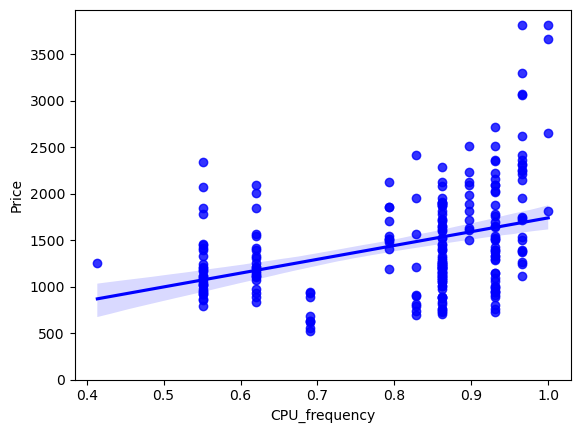

In [16]:
# CPU_frequency
sns.regplot(x="CPU_frequency",y="Price",data=df,color="Blue")
plt.ylim(0,)

(0.0, 3974.15)

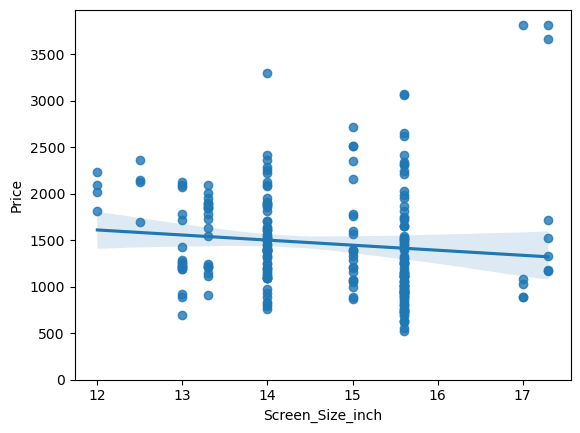

In [17]:
# Screen_Size_inch plot

sns.regplot(x="Screen_Size_inch",y="Price",data=df)
plt.ylim(0,)

(0.0, 3974.15)

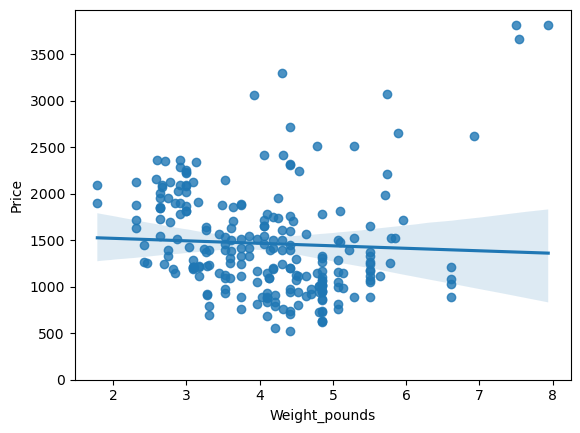

In [18]:
# Weight_pounds plot
sns.regplot(x="Weight_pounds",y="Price",data=df)
plt.ylim(0,)

In [19]:
# Correlation values of the three attributes with Price


for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
   print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())


Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


In [20]:
df[["CPU_frequency","Screen_Size_inch","Weight_pounds","Price"]].corr()

,CPU_frequency,Screen_Size_inch,Weight_pounds,Price
CPU_frequency,1.000000,-0.000948,0.066522,0.366666
Screen_Size_inch,-0.000948,1.000000,0.797534,-0.110644
Weight_pounds,0.066522,0.797534,1.000000,-0.050312
Price,0.366666,-0.110644,-0.050312,1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<Axes: xlabel='Category', ylabel='Price'>

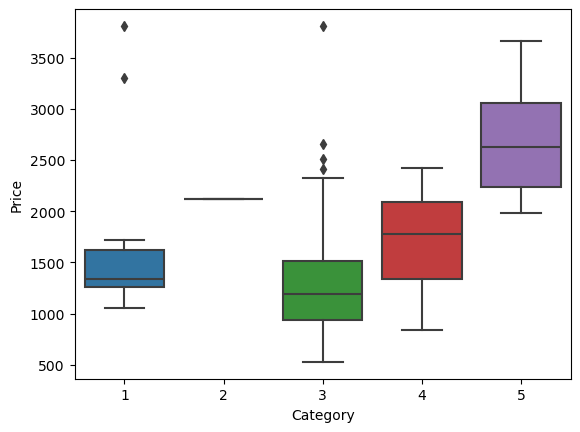

In [21]:
# Category Box plot
sns.boxplot(x="Category",y="Price",data=df)

<Axes: xlabel='GPU', ylabel='Price'>

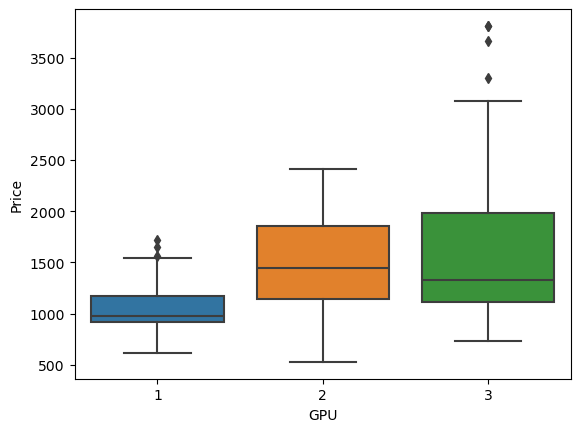

In [22]:
# GPU Box plot
sns.boxplot(x="GPU",y="Price",data=df)

<Axes: xlabel='OS', ylabel='Price'>

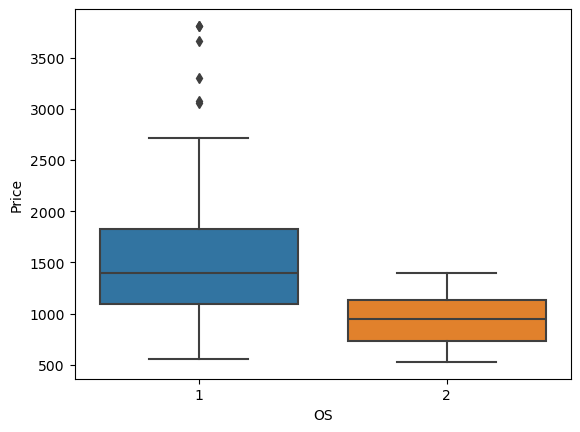

In [23]:
# OS Box plot
sns.boxplot(x="OS",y="Price",data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

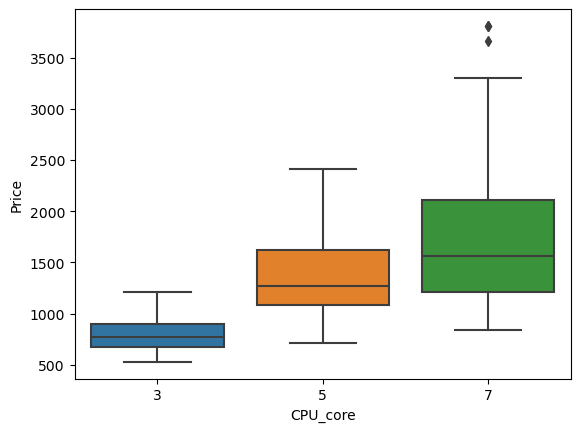

In [24]:
# CPU_core Box plot
sns.boxplot(x="CPU_core",y="Price",data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

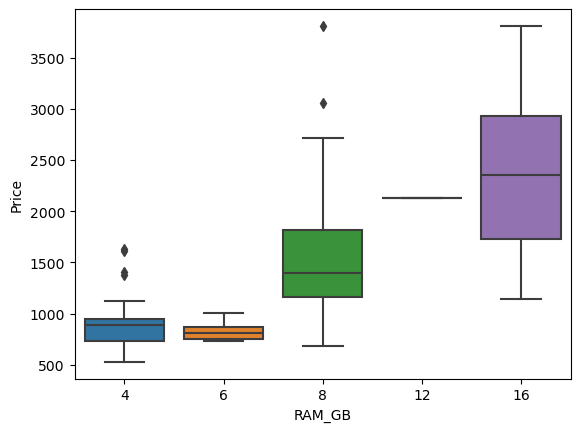

In [25]:
# RAM_GB Box plot
sns.boxplot(x="RAM_GB",y="Price",data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

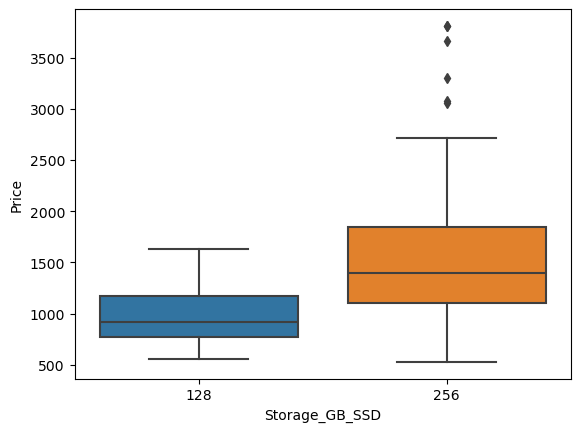

In [26]:
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD",y="Price",data=df)

# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [27]:
df.describe(include="all")

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [28]:
# create group
df_test=df[["GPU","CPU_core","Price"]]
df_grp=df_test.groupby(["GPU","CPU_core"],as_index=False).mean
df_grp()

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [34]:
# Create the Pivot table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv(filepath, header=0)

df_test = df[["GPU", "CPU_core", "Price"]]
df_grp = df_test.groupby(["GPU", "CPU_core"], as_index=False).mean()
df_pivot = df_grp.pivot_table(index="GPU", columns="CPU_core", values="Price")
df_pivot.head(10)

CPU_core,3,5,7
GPU,,,
1,769.250000,998.500000,1167.941176
2,785.076923,1462.197674,1744.621622
3,784.000000,1220.680000,1945.097561


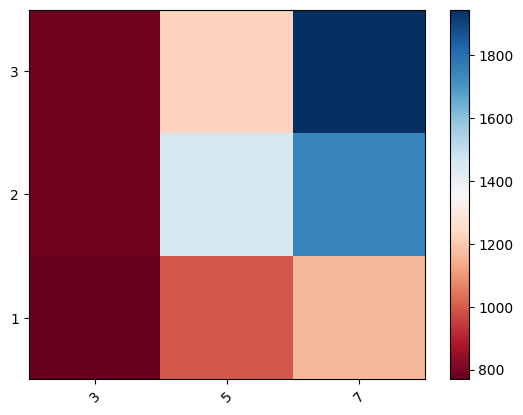

In [ ]:

fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

# label names
row_labels = df_pivot.columns
col_labels = df_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False, rotation=45)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.show()




# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [ ]:
for param in ["RAM_GB","CPU_frequency","Storage_GB_SSD","Screen_Size_inch","Weight_pounds","CPU_core","OS","GPU","Category"]:
    pearson_coef,p_vlaue=stats.pearsonr(df[param],df["Price"])
    print("\nThe Pearson Correlation Coefficient for ",param," is ",pearson_coef," with a P-value pf P = ",p_vlaue)
    
    


The Pearson Correlation Coefficient for  RAM_GB  is  0.5492972971857842  with a P-value pf P =  3.681560628842986e-20

The Pearson Correlation Coefficient for  CPU_frequency  is  0.36666555892588604  with a P-value pf P =  5.5024633507134316e-09

The Pearson Correlation Coefficient for  Storage_GB_SSD  is  0.24342075521810294  with a P-value pf P =  0.00014898923191724212

The Pearson Correlation Coefficient for  Screen_Size_inch  is  -0.11064420817118269  with a P-value pf P =  0.08853397846830766

The Pearson Correlation Coefficient for  Weight_pounds  is  -0.05031225837751551  with a P-value pf P =  0.43976938534338944

The Pearson Correlation Coefficient for  CPU_core  is  0.45939777733551157  with a P-value pf P =  7.912950127009089e-14

The Pearson Correlation Coefficient for  OS  is  -0.22172980114827398  with a P-value pf P =  0.0005696642559246697

The Pearson Correlation Coefficient for  GPU  is  0.28829819888814273  with a P-value pf P =  6.166949698364264e-06

The Pearson 